In [1]:
import matplotlib.pyplot as plt
import math

def approxD(f, x, h):
    return (f(x+h) - f(x)) / h

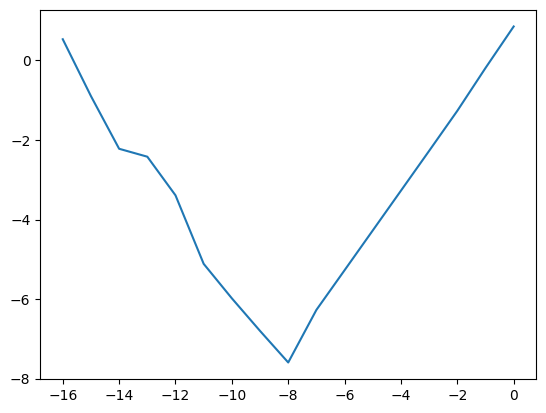

In [2]:
# Estimate differentiation of tangent
limExp = -16
centre = 1

log_x = list(range(0,limExp - 1,-1))

x = [10**i for i in log_x]
y_estimate = [approxD(math.tan, centre, h) for h in x]
y_actual = [(1 / math.cos(centre)) ** 2] * len(x)

log_error = list(map(math.log10, [abs(y_est - y_act) for y_est, y_act in zip(y_estimate, y_actual)]))
plt.plot(log_x, log_error, label = "error")

### Potential Explanation:
The reason is after a certain point h is too small hence f(x+h) and f(x) is too similar in value, hence when a minus operation is done, it loses precision, hence the error rises after a certain h

In [3]:
import sympy

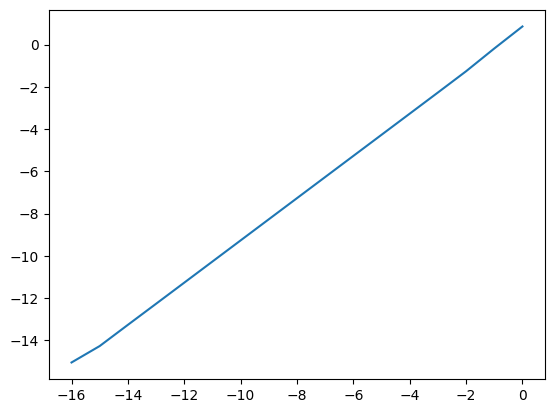

In [4]:
sym_minus = lambda x, y:  sympy.Add(x, sympy.Mul(y, -1))
sym_div = lambda x, y: sympy.Mul(x, sympy.Pow(y, -1))

def approxDSim(f, x, h):
    return sym_div(sym_minus(f(sympy.Add(x,h)), f(x)), h)

x_sym = [sympy.Pow(10, i) for i in log_x]

y_estimate_sym = [sympy.N(approxDSim(sympy.tan, centre, h)) for h in x_sym]
y_actual_sym = [sympy.N(sympy.Pow(sympy.cos(centre), -2))] * len(x)

log_error = list(map(lambda x: sympy.log(x, 10), [sympy.Abs(sym_minus(y_est, y_act)) for y_est, y_act in zip(y_estimate_sym, y_actual_sym)]))
plt.plot(log_x, log_error, label = "error")

### Potential Explanation:
Symbolic evalutation helps with rounding error, hence the error decreases as h decreases as expected